In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from numpy.testing import assert_array_equal
from tqdm.notebook import tqdm

In [2]:
from microagg1d.main import _simple_dynamic_program, compute_cluster_cost_sorted
from microagg1d.wilber import Wilber

In [4]:
ns = [100, 1000, 10_000, 100_000, 1_000_000]
records = []
for n in tqdm(ns, leave=False):
    for sample in tqdm(range(10), leave=False):
        np.random.seed(sample)
        arr = np.random.rand(n)
        arr.sort()
        for k in tqdm([2, 5, 10, 20, 30, 50, 100, 200, 500, 1000], leave=False):
            if k > n/2:
                continue
            start = time.time()
            result1 = Wilber(arr, k)
            end = time.time()
            records.append(("wilber", n, k, sample, end - start))
            
            
            start = time.time()
            result2 = _simple_dynamic_program(arr, k)
            end = time.time()
            records.append(("simple", n, k, sample, end - start))
            
            start = time.time()
            result3 = Wilber(arr, k, stable=True)
            end = time.time()
            records.append(("wilber_stable", n, k, sample, end - start))
            
            start = time.time()
            result4 = _simple_dynamic_program(arr, k, stable=True)
            end = time.time()
            records.append(("simple_stable", n, k, sample, end - start))
            
            #try:
            #    assert_array_equal(result1, result2, f"n={n} seed={sample} k={k}")
            #except AssertionError as e:
            #    cost1 = compute_cluster_cost_sorted(arr, result1)
            #    cost2 = compute_cluster_cost_sorted(arr, result2)
            #    if not cost1==cost2:
            #        raise e

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
df = pd.DataFrame.from_records(records, columns=["name", "n", "k", "sample", "time"])

In [11]:
def get_vals(df, name, n, max_k=None):
    df2 = df[df["name"]==name]
    if not max_k is None:
        df2=df2[df2["k"] < max_k ]
    df2 = df2[df2["n"]==n]
    df2 = df2.drop(["name", "n", "sample"], axis=1)
    df2 = df2.groupby("k").aggregate((np.mean, np.std))
    return df2.index, df2.time["mean"], df2.time["std"], 

In [7]:
get_vals(df, "simple", 100)

(Int64Index([2, 5, 10, 20, 30, 50], dtype='int64', name='k'),
 k
 2     0.0
 5     0.0
 10    0.0
 20    0.0
 30    0.0
 50    0.0
 Name: mean, dtype: float64,
 k
 2     0.0
 5     0.0
 10    0.0
 20    0.0
 30    0.0
 50    0.0
 Name: std, dtype: float64)

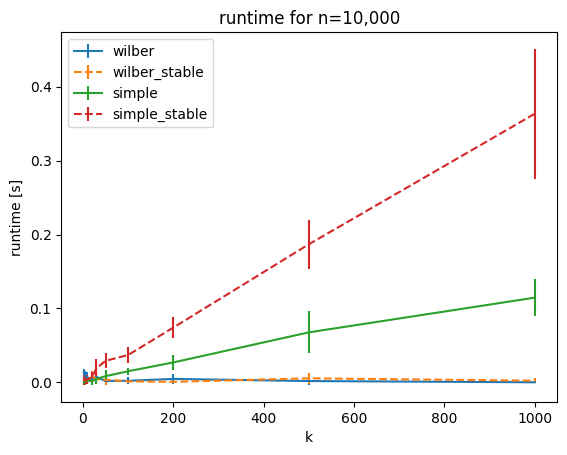

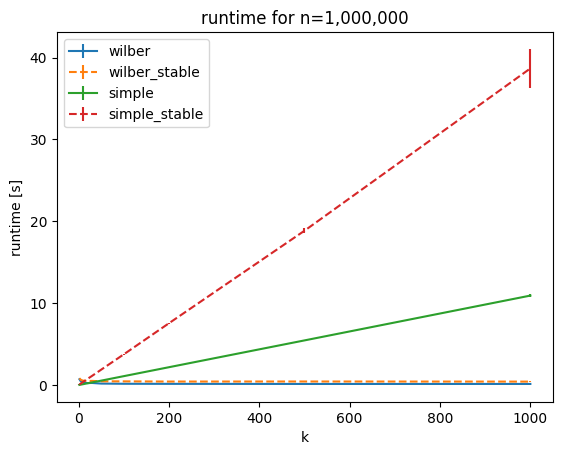

In [20]:
max_k = None
for n in [100_00, 1_000_000]:
    plt.figure()
    plt.errorbar(*get_vals(df, "wilber", n, max_k), label="wilber")
    plt.errorbar(*get_vals(df, "wilber_stable", n, max_k), label="wilber_stable", linestyle="--")
    plt.errorbar(*get_vals(df, "simple", n, max_k), label="simple")
    plt.errorbar(*get_vals(df, "simple_stable", n, max_k), label="simple_stable", linestyle="--")
    plt.ylabel("runtime [s]")
    plt.xlabel("k")
    plt.title(f"runtime for n={n:,}")
    plt.legend()
    #plt.xscale("log")

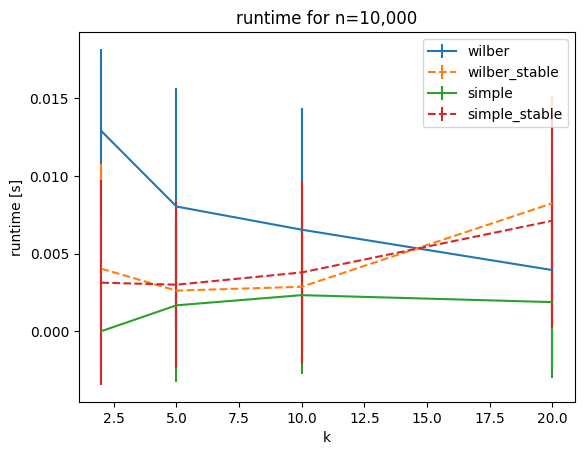

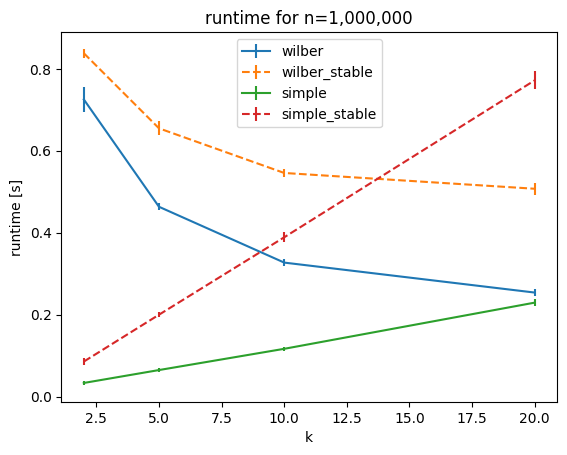

In [19]:
max_k = 21
for n in [100_00, 1_000_000]:
    plt.figure()
    plt.errorbar(*get_vals(df, "wilber", n, max_k), label="wilber")
    plt.errorbar(*get_vals(df, "wilber_stable", n, max_k), label="wilber_stable", linestyle="--")
    plt.errorbar(*get_vals(df, "simple", n, max_k), label="simple")
    plt.errorbar(*get_vals(df, "simple_stable", n, max_k), label="simple_stable", linestyle="--")
    plt.ylabel("runtime [s]")
    plt.xlabel("k")
    plt.title(f"runtime for n={n:,}")
    plt.legend()